[[20.5 20.7 18.5 21.7 23.3 24.1 22.7 23.   9.4  9.8  8.5  9.1 20.4 19.7
  20.6 21.6 30.1 30.3 30.3 29.2  8.   8.7  6.7  8.6 18.4 17.3 18.6 19.1
  14.5 12.2]
 [10.6 11.4 25.4 27.5 25.6 27.9 20.8 21.  20.3 21.2 24.9 24.8 24.7 25.
  22.8 23.3 22.3 23.3 18.4 18.1 14.6 16.  12.7 12.7 11.4 12.  24.5 23.2
  21.2 22.1]
 [18.1 17.6 16.4 17.5 20.1 19.9 16.  21.3 20.6 22.3 18.9 20.7  8.9 10.3
   8.6  8.4 13.8 14.8 11.4 13.6 20.6 21.  19.5 20.1 23.7 24.3 22.4 23.7
   5.7  6.6]
 [ 6.   6.2  5.9  6.9  5.3  5.3 10.2 10.  10.   9.2 10.4 11.5 10.7 10.9
  10.6 12.3  9.1 13.1  2.1  3.   0.2  2.2 29.  29.1 28.3 31.5  0.1  2.1
   0.5 -0.5]]
[[20.5 23.3  9.4 20.4 30.1  8.  18.4 14.5 25.4 20.8 24.9 22.8 18.4 12.7
  24.5 18.1 20.1 20.6  8.9 13.8 20.6 23.7  5.7  5.9 10.2 10.4 10.6  2.1
  29.   0.1]
 [20.7 24.1  9.8 19.7 30.3  8.7 17.3 12.2 27.5 21.  24.8 23.3 18.1 12.7
  23.2 17.6 19.9 22.3 10.3 14.8 21.  24.3  6.6  6.9 10.  11.5 12.3  3.
  29.1  2.1]
 [18.5 22.7  8.5 20.6 30.3  6.7 18.6 10.6 25.6 20.3 24.7 22

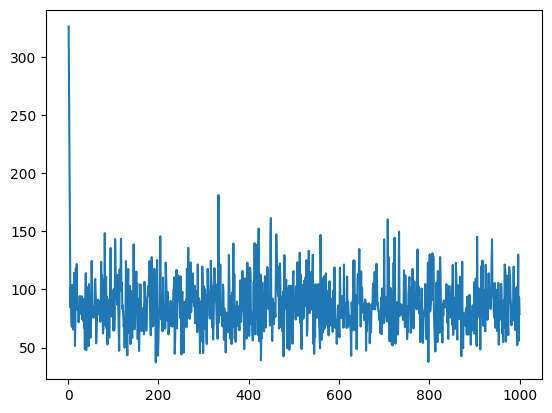

In [72]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df=pandas.read_csv(r'E:\Study\Python\the_third_course\temperature_dataset.csv')
data=np.array(df)#data读不全
learning_rate=0.0001
m_train=3000
m_test=np.shape(data)[0]-3000
iteration=1
epochs=10
mini_batch=30
rng=np.random.default_rng(1)
m_all=data.shape[0]
d=data.shape[1]-1
x_train=data[:m_train,1:].T
x_test=data[m_train:,1:].T
y_train=data[0:m_train,0].T
y_test=data[m_train:,0].T
w=np.zeros((d,1)).reshape(-1,1)
v=np.ones((mini_batch,1))
b=0
train_set=data[0:m_train,:]
cost_saved=[]


    for i in range(0,m_train//mini_batch):
        x=train_set[i*mini_batch:(i+1)*mini_batch,1:].reshape(d,-1)
        print(x)
        print(train_set[i*mini_batch:(i+1)*mini_batch,1:].T)
        y=train_set[i*mini_batch:(i+1)*mini_batch,0].T
        y_hat=np.dot(w.T,x)+b
        
        e=y_hat-y
        w=w-2*learning_rate*np.dot(x,e.T)/mini_batch
        b=b-2*learning_rate*np.dot(e,v)/mini_batch
        cost=np.dot(e,e.T)/mini_batch
        cost_saved.append(cost.item(0))
        
y_hat_train=np.dot(w.T,x_train)+b*v
e=y_hat_train-y_train
mse_train=np.dot(e,e.T)/m_train


y_hat_test=np.dot(w.T,x_test)+b
e=y_hat_test-y_test
mse_test=np.sqrt(np.dot(e,e.T)/m_test)


plt.plot(range(1,np.size(cost_saved)+1),cost_saved)
plt.show()
